# Ensembles

In [0]:
# Get basic libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use("fivethirtyeight")

In [0]:
# Figure Customization
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams['figure.dpi'] = 50
plt.rcParams['image.cmap'] = 'viridis'

In [0]:
# Font Settings
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = '10'

In [0]:
# Save Figure Customization
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.5

In [0]:
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.linewidth'] = 0.3
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.labelpad'] = 10
#plt.rcParams['axes3d.grid'] = False

In [0]:
plt.rcParams["grid.linestyle"] = "-"
plt.rcParams["grid.linewidth"] = 0.3
plt.rcParams["grid.color"] = (0.5, 0.5, 0.5, 0.5)

In [0]:
# Line Customization
plt.rcParams['lines.linewidth'] = 0.3

In [0]:
# Tick Customization
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.major.pad'] = 10.0
plt.rcParams['ytick.major.pad'] = 10.0
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8


In [0]:
def hide_spines():
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""

    # Retrieve a list of all current figures.
    figures = [x for x in plt._pylab_helpers.Gcf.get_all_fig_managers()]
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            #ax.spines['right'].set_color('none')
            #ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('none')
            ax.yaxis.set_ticks_position('none')

In [0]:
# Get Classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from mlxtend.classifier import StackingClassifier

In [0]:
# Create metrics to store
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split

In [0]:
# Create datasets for demo
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

## Create Dataset & Preprocessing

In [0]:
# Create a 10 feature dataset to do the analysis
X8, y = make_classification(n_samples = 1000, n_features=8, n_redundant=0, 
                             n_informative=8, random_state=250, n_classes = 2)

In [0]:
# Actual 3 variable dataset for our example
X = MDS(n_components=3, n_jobs=-1).fit_transform(X8)
X = StandardScaler().fit_transform(X)

## Create Additional Feature Set

In [0]:
# Create a pca function to transform 3 features to 2 dimensions
pca = PCA(n_components=2).fit(X)

In [0]:
XT = pca.transform(X)

In [0]:
X = np.c_[X, XT]

In [0]:
# Create train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=123)

## Visualise the Dataset

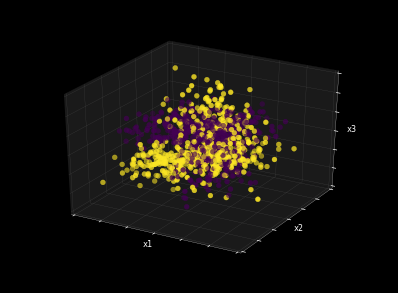

In [202]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c= y, s = 50)

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")

ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-3,3)

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.zaxis.set_major_formatter(plt.NullFormatter())

ax.xaxis.labelpad = -7
ax.yaxis.labelpad = -7
ax.zaxis.labelpad = -7

ax.w_xaxis.set_pane_color((0.1, 0.1, 0.1, 1.0))
ax.w_yaxis.set_pane_color((0.1, 0.1, 0.1, 1.0))
ax.w_zaxis.set_pane_color((0.1, 0.1, 0.1, 1.0))
ax.patch.set_facecolor('black')
#ax.set_axis_bgcolor((0.2, 0.2, 0.2))

#plt.savefig("andjela/img/fig_00_data_3d.png", facecolor=fig.get_facecolor(), edgecolor='none')

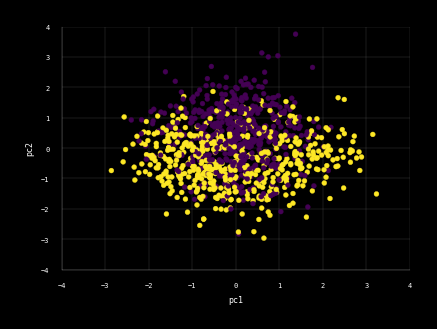

In [203]:
# Lets plot the data set in 2 dimensions
plt.scatter(X[:,3], X[:,4], c=y, s=50)
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.xlim(-4,4)
plt.ylim(-4,4)
hide_spines()
plt.tick_params(labelbottom='off',labelleft='off')
#plt.axis("off")
#plt.savefig("andjela/img/fig_01_data_2d.png")

## Start the Classifier

In [0]:
# Initiate the Classifiers
names = [
     # 0, 1, 2, 3  
    "Logistic (x1,x2)", "Logistic (x2,x3)", "Logistic (x1,x3)", "Logistic (pc1,pc2)",
    
    # 4, 5, 6, 7
    "Logistic (C=1)", "Logistic (C=1e-1)", "Logistic (C=1e-3)", "Logistic (C=1e-5)", 
    
    # 8, 9, 10, 11
    "Logistic", "SVM-Linear", "Decision Tree", "K Nearest Neighbour",
    
    # 12, 13, 14, 15
    "Patching", "Bagging", "Random Subspace", "Random Patches",
    
    # 16, 17, 18, 19
    "Decision Tree", "Bagging", "Random Forest", "Extremely Random",

    # 20, 21, 22, 23
    "Decision Tree", "Ada Boost", "Gradient Boosting (d=1)", "Gradient Boosting (d=2)",

    # 24, 25, 26, 27
    "Gaussian", "SVM - RBF", "Gradient Boosting", "Voting",
    
    # 28, 29, 30, 31
    "Gaussian", "SVM - RBF", "Gradient Boosting", "Stacking",

    
]

classifiers = [
    LogisticRegression(random_state = 123, n_jobs=-1),
    LogisticRegression(random_state = 123, n_jobs=-1),
    LogisticRegression(random_state = 123, n_jobs=-1),
    LogisticRegression(random_state = 123, n_jobs=-1),
    
    LogisticRegression(C=1, random_state = 123, n_jobs=-1),
    LogisticRegression(C=1e-1, random_state = 123, n_jobs=-1),
    LogisticRegression(C=1e-3, random_state = 123, n_jobs=-1), 
    LogisticRegression(C=1e-5, random_state = 123, n_jobs=-1),
    
    LogisticRegression(random_state = 123, n_jobs=-1),
    SVC(kernel='linear', probability=True),
    DecisionTreeClassifier(random_state=0),
    KNeighborsClassifier(n_neighbors=3),
    
    BaggingClassifier(DecisionTreeClassifier(random_state=0), max_samples=0.5, bootstrap=False),
    BaggingClassifier(DecisionTreeClassifier(random_state=0), max_samples=0.5, bootstrap=True),
    BaggingClassifier(DecisionTreeClassifier(random_state=0), max_features=1, bootstrap=False),
    BaggingClassifier(DecisionTreeClassifier(random_state=0), max_samples=0.5, max_features=1,
                      bootstrap=False),
    
    DecisionTreeClassifier(random_state=0),
    BaggingClassifier(DecisionTreeClassifier(random_state=0), max_samples=0.5, bootstrap=True),
    RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1),
    ExtraTreesClassifier(n_estimators=10, random_state=0, n_jobs=-1),
    
    DecisionTreeClassifier(random_state=0),
    AdaBoostClassifier(n_estimators=10, random_state=0),
    GradientBoostingClassifier(n_estimators=10, max_depth=1, random_state=0),
    GradientBoostingClassifier(n_estimators=10, max_depth=2, random_state=0),
    
    GaussianNB(priors = [0.5,0.5]),
    SVC(kernel='rbf', probability=True),
    GradientBoostingClassifier(n_estimators=10, max_depth=2, random_state=0),
    VotingClassifier(estimators=[('dt',  GaussianNB(priors = [0.5,0.5])), 
                                 ('knn', SVC(kernel='rbf', probability=True)),
                                 ('svc', GradientBoostingClassifier(n_estimators=10, 
                                                                    max_depth=2, random_state=0))
                                ],
                      voting='soft', weights=[1, 1, 1]),
    
    GaussianNB(priors = [0.5,0.5]),
    SVC(kernel='rbf', probability=True),
    GradientBoostingClassifier(n_estimators=10, max_depth=2, random_state=0),
    StackingClassifier(classifiers=[GaussianNB(priors = [0.5,0.5]),
                                    SVC(kernel='rbf', probability=True),
                                    GradientBoostingClassifier(n_estimators=10, max_depth=2, random_state=0),
                                    ], 
                       meta_classifier=LogisticRegression(random_state = 123, n_jobs=-1)),
    
    
    GaussianNB(priors = [0.5,0.5]), 
    MLPClassifier(hidden_layer_sizes=2, activation="logistic")
    
]

## Make a Mesh

In [0]:
# Create mesh points for plotting the boundaries for pca1 and pca2
def mesh(L):
    step = 0.1  # step size in the mesh
    a_min, a_max = L[:, 0].min() - .5, L[:, 0].max() + .5
    b_min, b_max = L[:, 1].min() - .5, L[:, 1].max() + .5
    aa, bb = np.meshgrid(np.arange(a_min, a_max, step),
                         np.arange(b_min, b_max, step))
    aabb = np.c_[aa.ravel(), bb.ravel()]
    shape = aa.shape
    return aa, bb, aabb, shape

## Make a Simple Model

In [0]:
# Create array to store the predictions and score
y_pred = np.empty([y_test.shape[0],40])
scores = np.empty([40])

In [0]:
# Create combination - (x1,x2), (x2,x3), (x1,x3), (pca1, pca2)
f = [[0,1],[1,2],[0,2],[3,4]]

In [208]:
X[:,f[1]]

array([[ 1.2596847 , -0.93845747],
       [-0.62056983,  1.53215933],
       [-0.9525168 ,  0.25317636],
       ...,
       [-0.25396833, -0.22505775],
       [-1.60099508, -1.18482991],
       [ 0.7329166 , -1.33648966]])

In [209]:
X[:,f[3]]

array([[ 0.49134865,  1.26647304],
       [-1.34110923, -0.79005735],
       [-1.24645807, -1.45970977],
       ...,
       [ 0.11132041, -0.28275056],
       [ 2.03104978, -1.14956085],
       [ 0.65786297,  0.67199878]])

In [0]:
# Make a simple model - Logistics Regression
def classifier_simple_plot(n1, n2, figname):
    # Run the classifier, score and plot them
    for idx in np.arange(n1,n2):
        clf = classifiers[idx]
        clf.fit(X_train[:,f[idx]], y_train)
        y_pred[:,idx] = clf.predict_proba(X_test[:,f[idx]])[:,1]
        #auc = roc_auc_score(y_test, y_pred[:,idx])
        auc = cross_val_score(clf, X_train[:,f[idx]], y_train, cv=5, scoring='roc_auc').mean()
        print(idx, f[idx], auc, names[idx])

        aa, bb, aabb, shape = mesh(X[:,f[idx]])
        
        Z = clf.predict_proba(aabb)[:, 1]
        Z = Z.reshape(shape)

        plt.subplot(2, 2, idx - n1 + 1)
        plt.scatter(X[:,f[idx][0]], X[:,f[idx][1]], c=y, s=50)
        plt.contourf(aa, bb, Z, alpha=0.8)
        plt.title(names[idx])
        plt.text(aa.max() - .3, bb.min() + .3, 'AUC = ' + ('%.4f' % auc).lstrip('0'), size=18,
            horizontalalignment='right', color = "black")
        plt.axis("off")
        idx += 1
    # Save the plot    
    #plt.savefig("andjela/img/" + figname + ".png")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'l

0 [0, 1] 0.7395425501464826 Logistic (x1,x2)
1 [1, 2] 0.718787499139844 Logistic (x2,x3)
2 [0, 2] 0.5805708641627059 Logistic (x1,x3)
3 [3, 4] 0.7386206764656936 Logistic (pc1,pc2)
CPU times: user 253 ms, sys: 165 ms, total: 418 ms
Wall time: 235 ms


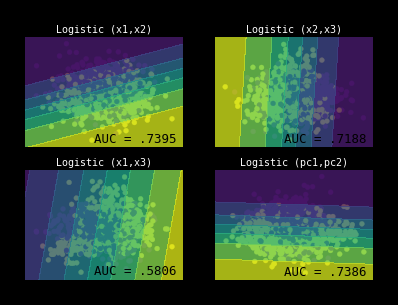

In [211]:
%%time
classifier_simple_plot(0, 4, "fig_02_simple_models")

## Run Multiple Classifier - PCA1 and PCA2

In [212]:
X[:,3:5]

array([[ 0.49134865,  1.26647304],
       [-1.34110923, -0.79005735],
       [-1.24645807, -1.45970977],
       ...,
       [ 0.11132041, -0.28275056],
       [ 2.03104978, -1.14956085],
       [ 0.65786297,  0.67199878]])

In [0]:
xx4, xx5, xx4xx5, xx4Shape = mesh(X[:,3:5])

In [0]:
def classifier_plot(n1, n2, figname):
    # Run the classifier, score and plot them
    for idx in np.arange(n1,n2):
        
        clf = classifiers[idx]
        clf.fit(X_train[:,3:5], y_train)
        y_pred[:,idx] = clf.predict_proba(X_test[:,3:5])[:,1]
        #auc = roc_auc_score(y_test, y_pred[:,idx])
        auc = cross_val_score(clf, X_train[:,3:5], y_train, cv=5, scoring='roc_auc').mean()
        
        Z = clf.predict_proba(xx4xx5)[:, 1]
        Z = Z.reshape(xx4.shape)

        plt.subplot(2, 2, idx - n1 + 1)
        plt.scatter(X[:,3], X[:,4], c=y, s=50)
        plt.contourf(xx4, xx5, Z, alpha=0.8)
        plt.title(names[idx])
        plt.text(xx4.max() - .3, xx5.min() + .3, 'AUC = ' + ('%.4f' % auc).lstrip('0'), size=18,
            horizontalalignment='right', color = "black")
        plt.axis("off")
        idx += 1
    # Save the plot    
    #plt.savefig("andjela/img/" + figname + ".png")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'l

CPU times: user 263 ms, sys: 160 ms, total: 423 ms
Wall time: 242 ms


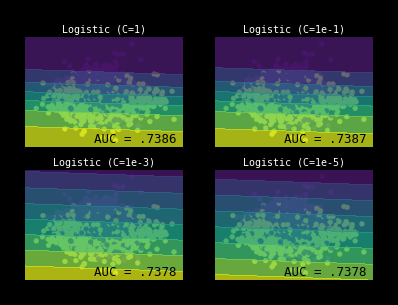

In [215]:
%%time
classifier_plot(4,8, "fig_03_simple_params")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'l

CPU times: user 254 ms, sys: 175 ms, total: 429 ms
Wall time: 234 ms


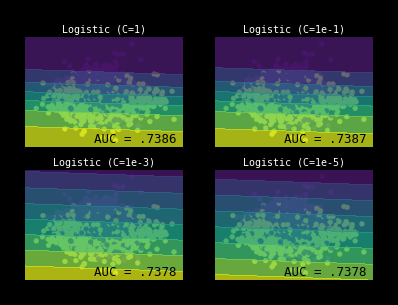

In [216]:
%%time
classifier_plot(4, 8, "fig_04_many_models")

## Patching, Bagging, RandomSubspace, Random Patches

CPU times: user 841 ms, sys: 348 ms, total: 1.19 s
Wall time: 790 ms


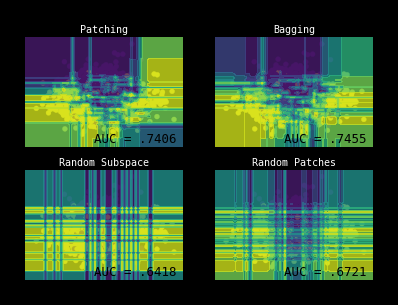

In [217]:
%%time
classifier_plot(12,16, "fig_05_bagging")

## Randomised Forest

CPU times: user 1.01 s, sys: 566 ms, total: 1.57 s
Wall time: 15.3 s


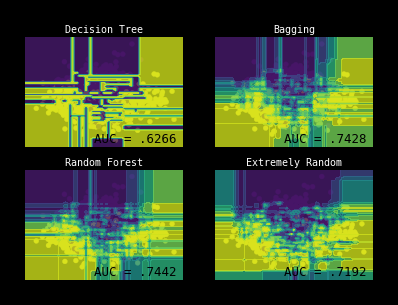

In [218]:
%%time
classifier_plot(16,20, "fig_06_forest")

## Boosting

CPU times: user 473 ms, sys: 278 ms, total: 751 ms
Wall time: 439 ms


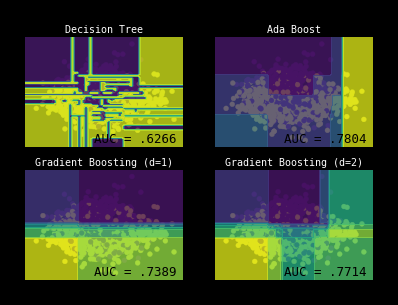

In [219]:
%%time
classifier_plot(20,24, "fig_07_Boosting")

##  Voting

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

CPU times: user 1.53 s, sys: 343 ms, total: 1.87 s
Wall time: 1.49 s


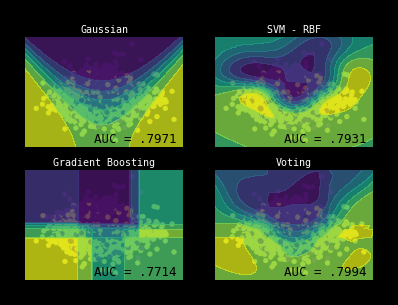

In [220]:
%%time
classifier_plot(24,28, "fig_08_voting")

## Stacking

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

CPU times: user 1.61 s, sys: 361 ms, total: 1.97 s
Wall time: 1.57 s


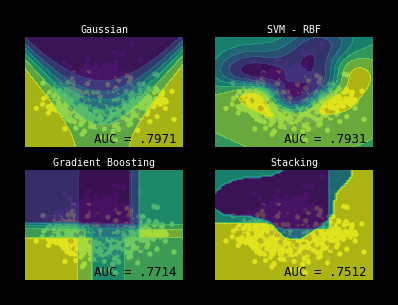

In [221]:
%%time
classifier_plot(28,32, "fig_09_stacking")